# Autoencoder Digits Example
**Train Stacked Autoencoders for Image Classification**

This example shows how to train stacked autoencoders to classify images of digits. 

Neural networks with multiple hidden layers can be useful for solving classification problems with complex data, such as images. Each layer can learn features at a different level of abstraction. however, training neural networks with multiple hidden layers can be difficult in practice. One way to effectively train a neural network with multiple layers is by training one layer at a time. You can achieve this by training a special type of network known as an autoencoder for each desired hidden layer.

This example shows you how to train a neural network with two hidden layers to classify digits in the images. First you train the hidden layers individually in an unsupervised fashion using autoencoders. Then you train a final softmax layer, and join the layers together to form a stacked network, which you train one final time in a supervised fashion. 


In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

(5000, 784)
(5000, 784)


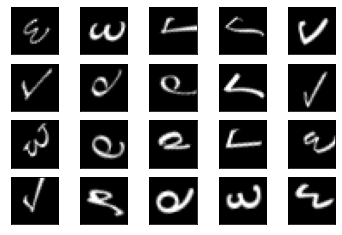

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data set
# This example uses synthetic data throughout, for training and testing.
# The synthetic images have been generated by applying random affine
# transformations to digit images created using different fonts.
# 
# Each digit image is 28-by-28 pixels, and there are 5,000 training
# examples. You can load the training data, and view some of the images.


# Load the training and testing data into memory.
x_train = pd.read_csv('xTrain.csv', header=None).to_numpy().T
y_train = pd.read_csv('tTrain.csv', header=None).to_numpy().T
x_test = pd.read_csv('xTest.csv', header=None).to_numpy().T
y_test = pd.read_csv('tTest.csv', header=None).to_numpy().T

print(x_train.shape)
print(x_test.shape)
print

# display some of the training image
for i in range(20):
    X_img = x_train[i].reshape(28,28)
    plt.subplot(4,5,i+1)
    fig = plt.imshow(X_img,cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

plt.show()

# Reshape and normalize keras data.
#x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

The labels for the images are stored in a 10-by-5000 matrix, where in  every column a single element will be 1 to indicate the class that the  digit belongs to, and all other elements in the column will be 0. It  should be noted that if the tenth element is 1, then the digit image is a zero.

In [2]:
## Training the first autoencoder
# Begin by training a sparse autoencoder on the training data without using
# the labels
# 
# An autoencoder is a neural network which attempts to replicate its input
# at its output. Thus, the size of its input will be the same as the size
# of its output. When the number of neurons in the hidden layer is less
# than the size of the input, the autoencoder learns a compressed
# representation of the input. 
# 
# Nueral networkds have weights randomly initialized before training
# Therefore the results from training are different each time. To avoid
# this behavior, explicitly set the random number generator seed.
np.random.seed(0)

In [3]:
## 
# Set the size of the hidden layer for the autoencoder. For the autoencoder
# that you are going to train, it is a good idea to make this smaller than
# the input size.
hiddenSize1 = 100

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
## 
# The type of autoencoder that you will train is an autoencoder. The autoencoder
# consists of two layers, the first layer consists of 100 sigmoid neurons which
# encodes the image into a 100 length feature vector. 
# The decoder layer learns the mapping from the encoded feature vector back to 
# the original image. 

in_size = 784
#Autoencoder layer 1
in_img = keras.Input(shape=(in_size,))  # Specify input shape
encoded = layers.Dense(hiddenSize1, activation='sigmoid')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid')(encoded)  # decoder layer

# Create the network model
autoencoder = keras.Model(in_img, decoded)
# We also create a model for only the encoder section of the network
encoder = keras.Model(in_img, encoded)
# Initialize the weights and specify our loss function (for measuring training 
# error)
autoencoder.compile(optimizer='adam', loss='mse')
# Run unsupervised training on the training set. We run the training for 50 epochs.
autoencoder.fit(x_train, x_train, epochs=400, batch_size=256,shuffle=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Epoch 1/400
5000/5000 [==============================] - 0s 65us/sample - loss: 0.1448
Epoch 2/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0562
Epoch 3/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0467
Epoch 4/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0454
Epoch 5/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0449
Epoch 6/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0447
Epoch 7/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0445
Epoch 8/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0443
Epoch 9/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0441
Epoch 10/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0440
Epoch 11/400
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0438
Epoch 12/400
5000/5000 [=================

5000/5000 [==============================] - 0s 39us/sample - loss: 0.0176
Epoch 95/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0174
Epoch 96/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0172
Epoch 97/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0171
Epoch 98/400
5000/5000 [==============================] - 0s 41us/sample - loss: 0.0169
Epoch 99/400
5000/5000 [==============================] - 0s 45us/sample - loss: 0.0168
Epoch 100/400
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0166
Epoch 101/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0164
Epoch 102/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0163
Epoch 103/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0161
Epoch 104/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0160
Epoch 105/400
5000/5000 [===============

5000/5000 [==============================] - 0s 39us/sample - loss: 0.0092
Epoch 187/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0092
Epoch 188/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0092
Epoch 189/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0091
Epoch 190/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0091
Epoch 191/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0090
Epoch 192/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0090
Epoch 193/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0090
Epoch 194/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0089
Epoch 195/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0089
Epoch 196/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0088
Epoch 197/400
5000/5000 [==========

5000/5000 [==============================] - 0s 38us/sample - loss: 0.0069
Epoch 279/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0068
Epoch 280/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0068
Epoch 281/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0068
Epoch 282/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0068
Epoch 283/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0068
Epoch 284/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0068
Epoch 285/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0068
Epoch 286/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0067
Epoch 287/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0067
Epoch 288/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0067
Epoch 289/400
5000/5000 [==========

5000/5000 [==============================] - 0s 38us/sample - loss: 0.0057
Epoch 371/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0057
Epoch 372/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0056
Epoch 373/400
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0056
Epoch 374/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0056
Epoch 375/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0056
Epoch 376/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0056
Epoch 377/400
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0056
Epoch 378/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0056
Epoch 379/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0056
Epoch 380/400
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0055
Epoch 381/400
5000/5000 [==========

## (a)

In [5]:
X = autoencoder.get_weights()[0][:,0].reshape((28, 28))
X

array([[-0.06894527, -0.00855409,  0.01375937, -0.00378996, -0.01470233,
         0.07199205, -0.08050878,  0.02124637, -0.07672875, -0.06147318,
        -0.05274551,  0.15861328,  0.08543996,  0.28188488,  0.20196457,
        -0.24572536, -0.3106567 , -0.33948758,  0.24472596,  0.20209584,
        -0.2125481 , -0.16379032,  0.04116283, -0.18426687, -0.45793024,
        -0.02808637,  0.06009243,  0.04644927],
       [ 0.07364386,  0.04041717, -0.0656545 , -0.05944262,  0.00432719,
         0.03193352, -0.07532171, -0.06848749,  0.03944932, -0.03762352,
         0.22875544, -0.05208084,  0.41620326, -0.1742357 , -0.05725679,
         0.21577892,  0.18307357,  0.14316855, -0.24767171, -0.26191786,
         0.32673702,  0.2625635 ,  0.3859859 , -0.5051531 , -0.46459645,
         0.13382043, -0.02365624, -0.04967654],
       [-0.00790364, -0.01193936,  0.00342149, -0.03397052, -0.05654957,
         0.04569638, -0.04661721,  0.38431612, -0.4048428 , -0.29600817,
        -0.20011336, -0.1514

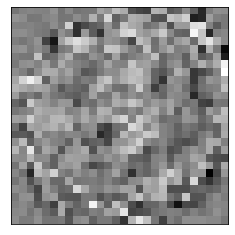

In [6]:
fig = plt.imshow(X,cmap='gray')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [7]:
##
# The 100-dimensional output from the hidden layer of the autoencoder is a
# compressed version of the input. Train the next autoencoder on a set of these
# vectors extracted from the training data. First, you must use the encoder
# from the trained autoencoder to generate the features.
feat1 = encoder.predict(x_train)
hiddenSize2 = 50

In [8]:
## Training the second autoencoder
# After training the first autoencoder, you train the second autoencoder in
# a similar way. The main difference is that you use the features that were
# generated from the first autoencoder as the training data in the second
# autoencoder. Also, you decrease the size of the hidden representation to
# 50, so that the encoder in the second autoencoder learns an even smaller
# representation of the input data.

in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid')(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid')(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(feat1, feat1, epochs=400, batch_size=256,shuffle=True)

Epoch 1/400
5000/5000 [==============================] - 0s 22us/sample - loss: 0.1314
Epoch 2/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0787
Epoch 3/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0567
Epoch 4/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0495
Epoch 5/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0471
Epoch 6/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0460
Epoch 7/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0454
Epoch 8/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0450
Epoch 9/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0447
Epoch 10/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0445
Epoch 11/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0443
Epoch 12/400
5000/5000 [===========================

Epoch 95/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0156
Epoch 96/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0154
Epoch 97/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0151
Epoch 98/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0149
Epoch 99/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0147
Epoch 100/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0144
Epoch 101/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0142
Epoch 102/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0140
Epoch 103/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0138
Epoch 104/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 105/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0133
Epoch 106/400
5000/5000 [============

5000/5000 [==============================] - 0s 7us/sample - loss: 0.0048
Epoch 188/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0047
Epoch 189/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0047
Epoch 190/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0046
Epoch 191/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0046
Epoch 192/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0045
Epoch 193/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0045
Epoch 194/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0045
Epoch 195/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0044
Epoch 196/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0044
Epoch 197/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0044
Epoch 198/400
5000/5000 [=====================

5000/5000 [==============================] - 0s 7us/sample - loss: 0.0027
Epoch 280/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0027
Epoch 281/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 282/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 283/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 284/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 285/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 286/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 287/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0026
Epoch 288/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0025
Epoch 289/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0025
Epoch 290/400
5000/5000 [=====================

Epoch 372/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 373/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 374/400
5000/5000 [==============================] - 0s 8us/sample - loss: 0.0014
Epoch 375/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 376/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 377/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 378/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 379/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 380/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 381/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 382/400
5000/5000 [==============================] - 0s 7us/sample - loss: 0.0014
Epoch 383/400
5000/5000 [=======

In [9]:
##
# You can extract a second set of features by passing the previous set
# through the encoder from the second autoencoder.

feat2 = encoder2.predict(feat1)

## (b)

In [10]:
encoder2.get_config()

{'name': 'model_3',
 'layers': [{'name': 'input_2',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 100),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_2'},
   'inbound_nodes': []},
  {'name': 'dense_2',
   'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 50,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'inbound_nodes': [['input_2', 0, 0, {}]]}],
 'input_layers': ['input_2', 0, 0],
 'output_layers': ['dense_2', 0, 0]}

In [11]:
for layer in encoder2.layers:
    print(layer.output_shape)

[(None, 100)]
(None, 50)


In [12]:
for layer in encoder2.layers:
    print(layer.input_shape)

[(None, 100)]
(None, 100)


In [13]:
encoder2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
Total params: 5,050
Trainable params: 5,050
Non-trainable params: 0
_________________________________________________________________


## (c)

In [14]:
X = encoder2.get_weights()[0][:,0]
X

array([ 0.8651627 , -0.60774267, -0.14531453,  0.03413103, -0.05510728,
       -0.28473428,  0.5163954 ,  0.14390089, -0.45453048, -0.1064852 ,
        0.09540591,  0.67136997, -0.05463463, -0.03337664, -0.22097145,
       -0.8883854 ,  0.08054943, -0.17698768,  0.6973006 , -0.0477232 ,
        0.13728939, -0.09927212, -0.21074235,  0.15751675, -0.3292883 ,
       -0.06832412, -0.33144638, -0.3897242 ,  1.0386747 ,  0.03114038,
        0.09660715, -0.10115384, -0.1665868 , -0.721138  ,  0.11105032,
       -0.03392827,  0.7082093 ,  0.10777728,  0.08067157, -0.02350566,
       -0.01671451, -0.01986011, -0.18491788,  0.4892692 ,  0.04640639,
       -0.1894672 , -0.35599694,  0.14275944,  0.16158539,  0.01821384,
        0.79731256, -0.67452216, -0.11351086, -0.161671  , -0.01301522,
       -0.5253875 ,  0.08678824, -0.04818688, -0.04868684,  0.09752237,
        0.16974   ,  0.02684657,  0.08425739,  0.09603377, -0.624844  ,
        0.14046347, -0.05214244, -0.10876732,  0.05061309,  0.06

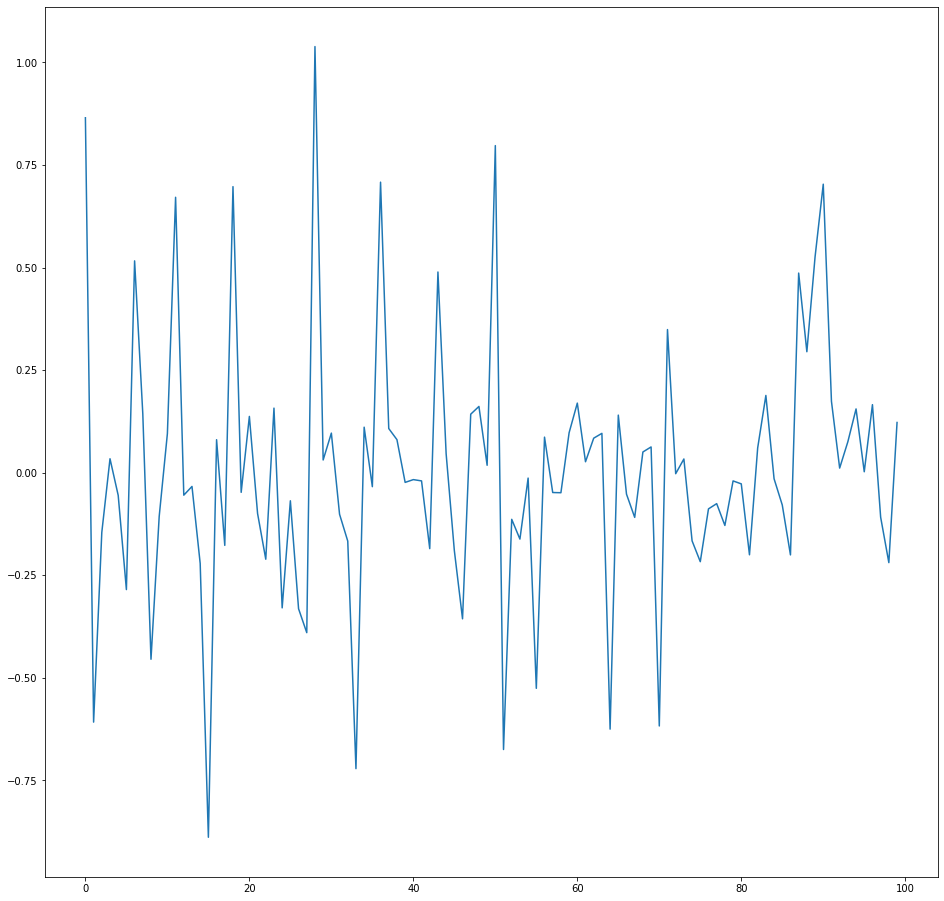

In [15]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.plot(X)

In [16]:
feat2.shape

(5000, 50)

In [17]:
y_train.T.shape

(10, 5000)

In [18]:
from tensorflow.keras.utils import to_categorical
##
# The original vectors in the training data had 784 dimensions. After
# passing them through the first encoder, this was reduced to 100
# dimensions. After using the second encoder, this was reduced again to 50
# dimensions. You can now train a final layer to classify these 
# 50-dimensional vectors into different digit classes.

## Training the final softmax layer
# Train a softmax layer to classify the 50-dimensional feature vectors.
# Unlike the autoencoders, you train the softmax layer in a supervised
# fashion using labels for the training data.

soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(10,activation='softmax')(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='mse')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
5000/5000 [==============================] - 0s 17us/sample - loss: 0.0917
Epoch 2/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0902
Epoch 3/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0897
Epoch 4/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0894
Epoch 5/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0891
Epoch 6/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0888
Epoch 7/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0885
Epoch 8/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0882
Epoch 9/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0878
Epoch 10/50
5000/5000 [==============================] - 0s 4us/sample - loss: 0.0875
Epoch 11/50
5000/5000 [==============================] - 0s 5us/sample - loss: 0.0872
Epoch 12/50
5000/5000 [==============================] - 0s 5u

In [19]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)

In [20]:
## Forming a stacked neural network
# You have trained three separate components of a stacked neural network in
# isolation. 

# As was explained, the encoders from the autoencoders have been used to
# extract features. You can stack the encoders from the autoencoders 
# together with the softmax layer to form a stacked network for classification.

#First we must specify the structure of our stacked model
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(10, activation='softmax')(layer2)

#Then the model must be created and initialized.
stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "mse")

# Then we transfer the weights from our previously trained layers. 
stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

In [21]:
##
# You can visualize the results with a confusion matrix.
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
    # Compute confusion matrix
    c_mat = np.zeros((10,10))
    for i in range(len(y_true)):
        c_mat[y_classified[i], y_true[i] ] += 1

    group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

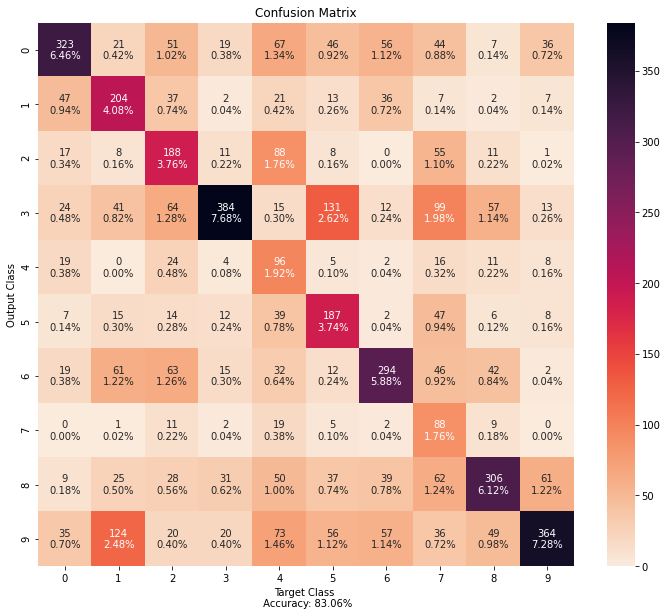

In [22]:
# Run x_Test through the stacked autoencoder. 
y_stacked = stacked_ae.predict(x_test)
# we need to convert it from 1 hot format back to the mnist labeling.
y_classified = np.argmax(y_stacked, axis=1)


y_true = np.argmax(y_test, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [23]:
## Fine tuning the stacked neural network
# The results for the stacked neural network can be improved by performing
# backpropagation on the whole multilayer network. This process is often
# referred to as fine tuning.
#
# You fine tune the network by retraining it on the training data in a
# supervised fashion. Before you can do this, you have to reshape the
# training images into a matrix, as was done for the test images.

stacked_ae.fit(x_train, y_train, epochs=400,batch_size = 256, shuffle=True)

Epoch 1/400
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0713
Epoch 2/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0668
Epoch 3/400
5000/5000 [==============================] - 0s 19us/sample - loss: 0.0633
Epoch 4/400
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0602
Epoch 5/400
5000/5000 [==============================] - 0s 22us/sample - loss: 0.0573
Epoch 6/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0547
Epoch 7/400
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0524
Epoch 8/400
5000/5000 [==============================] - 0s 22us/sample - loss: 0.0503
Epoch 9/400
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0483
Epoch 10/400
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0465
Epoch 11/400
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0448
Epoch 12/400
5000/5000 [=================

5000/5000 [==============================] - 0s 19us/sample - loss: 0.0021
Epoch 95/400
5000/5000 [==============================] - 0s 19us/sample - loss: 0.0020
Epoch 96/400
5000/5000 [==============================] - 0s 19us/sample - loss: 0.0020
Epoch 97/400
5000/5000 [==============================] - 0s 19us/sample - loss: 0.0019
Epoch 98/400
5000/5000 [==============================] - 0s 19us/sample - loss: 0.0018
Epoch 99/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0018
Epoch 100/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0017
Epoch 101/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0017
Epoch 102/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0016
Epoch 103/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0016
Epoch 104/400
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0016
Epoch 105/400
5000/5000 [===============

5000/5000 [==============================] - 0s 21us/sample - loss: 2.6930e-04
Epoch 184/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.5856e-04
Epoch 185/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.5151e-04
Epoch 186/400
5000/5000 [==============================] - 0s 21us/sample - loss: 2.4657e-04
Epoch 187/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.4016e-04
Epoch 188/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.3705e-04
Epoch 189/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.3323e-04
Epoch 190/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.2920e-04
Epoch 191/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.2602e-04
Epoch 192/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.2348e-04
Epoch 193/400
5000/5000 [==============================] - 0s 21us/sample - loss: 2.

5000/5000 [==============================] - 0s 20us/sample - loss: 2.9819e-05
Epoch 272/400
5000/5000 [==============================] - 0s 19us/sample - loss: 2.9158e-05
Epoch 273/400
5000/5000 [==============================] - 0s 19us/sample - loss: 2.8573e-05
Epoch 274/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.7998e-05
Epoch 275/400
5000/5000 [==============================] - 0s 19us/sample - loss: 2.7478e-05
Epoch 276/400
5000/5000 [==============================] - 0s 19us/sample - loss: 2.6961e-05
Epoch 277/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.6511e-05
Epoch 278/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.6034e-05
Epoch 279/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.5505e-05
Epoch 280/400
5000/5000 [==============================] - 0s 21us/sample - loss: 2.5126e-05
Epoch 281/400
5000/5000 [==============================] - 0s 20us/sample - loss: 2.

5000/5000 [==============================] - 0s 20us/sample - loss: 8.5260e-06
Epoch 360/400
5000/5000 [==============================] - 0s 19us/sample - loss: 8.4335e-06
Epoch 361/400
5000/5000 [==============================] - 0s 20us/sample - loss: 8.3373e-06
Epoch 362/400
5000/5000 [==============================] - 0s 20us/sample - loss: 8.2341e-06
Epoch 363/400
5000/5000 [==============================] - 0s 20us/sample - loss: 8.1406e-06
Epoch 364/400
5000/5000 [==============================] - 0s 20us/sample - loss: 8.0411e-06
Epoch 365/400
5000/5000 [==============================] - 0s 20us/sample - loss: 7.9515e-06
Epoch 366/400
5000/5000 [==============================] - 0s 20us/sample - loss: 7.8629e-06
Epoch 367/400
5000/5000 [==============================] - 0s 20us/sample - loss: 7.7531e-06
Epoch 368/400
5000/5000 [==============================] - 0s 20us/sample - loss: 7.6729e-06
Epoch 369/400
5000/5000 [==============================] - 0s 20us/sample - loss: 7.

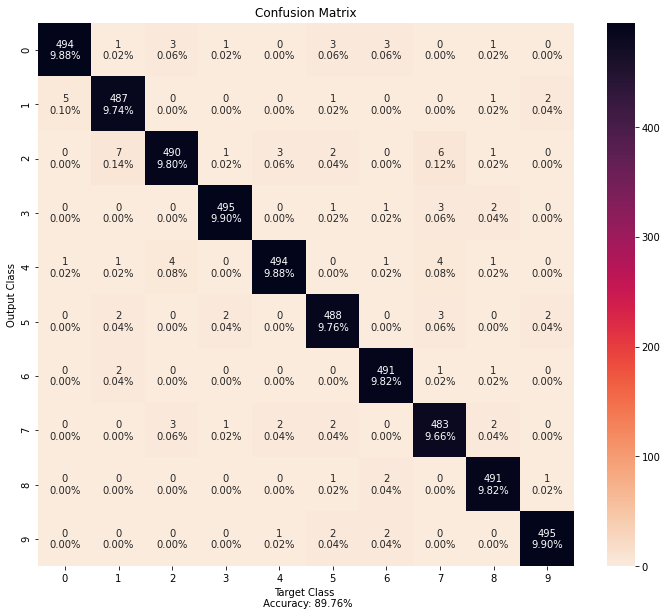

In [24]:
# Finally,view the results of the fine tuning on the confusion matrix. 
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

# plot confusion matrix
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_classified, y_true)

## Summary
This example showed how to train a stacked neural network to classify digits
in images using autoencoders. The steps that have been
outlined can be applied to other similar problems, such as classifying
images of letters, or even small images of objects of a specific
category.